# Clustering Algorithm
This section compares the effects of the K-Means and DBSCAN algorithms.

## Dataset Pre-processing

In [1]:
import os
from collections  import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set()

### The directory containing all of the relevant data files.

In [3]:
dataset_root = '/Users/lila/Downloads/Data Science Toolbox/KDD'

In [4]:
current_path = %pwd

In [5]:
raw_data = os.path.join(dataset_root, 'kddcup.data_10_percent')

### Original KDD dataset feature names 
Obtained from:

http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names

http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

In [6]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']

### Difference between nominal, binary and numeric features

In [7]:
col_names = np.array(header_names)

nominal_idx = [1,2,3]
binary_idx = [6, 11,13,14,20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

### Training_attack_types.txt maps each of the 22 different attacks to 1 category
File obrained from :

http://kdd.ics.udi.edu/databases/kddcup99/training_attack_types

In [8]:
category = defaultdict(list)
category[0].append('normal.')

In [9]:
with open(r'/Users/lila/Downloads/Data Science Toolbox/KDD/training_attack_types1.0.txt', mode = 'r', encoding = 'utf-8-sig') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        cat = 1
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])
print (attack_mapping)

{'normal.': 0, 'back.': 1, 'land.': 1, 'neptune.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1, 'apache2.': 1, 'udpstorm.': 1, 'processtable.': 1, 'worm.': 1, 'satan.': 1, 'ipsweep.': 1, 'nmap.': 1, 'portsweep.': 1, 'mscan.': 1, 'saint.': 1, 'guess_passwd.': 1, 'ftp_write.': 1, 'imap.': 1, 'phf.': 1, 'multihop.': 1, 'warezmaster.': 1, 'warezclient.': 1, 'spy.': 1, 'xlock.': 1, 'xsnoop.': 1, 'snmpguess.': 1, 'snmpgetattack.': 1, 'httptunnel.': 1, 'sendmail.': 1, 'named.': 1, 'buffer_overflow.': 1, 'loadmodule.': 1, 'rootkit.': 1, 'perl.': 1, 'sqlattack.': 1, 'xterm.': 1, 'ps.': 1, 'mailbomb.': 1}


In [10]:
data_df = pd.read_csv(raw_data, names=header_names)
data_df['attack_category'] = data_df['attack_type'].map(lambda x: attack_mapping[x])

Reduce the data set for the clustering algorithm to work correctly

In [11]:
data_df = data_df.sample(n=42000)

In [12]:
#Data preparation
data_Y = data_df['attack_category']
data_x_raw = data_df.drop(['attack_category'], axis=1)

In [13]:
train_x_df, test_x_df, train_Y, test_Y = train_test_split(data_x_raw, data_Y, test_size=0.2, random_state=42)

In [14]:
train_df = pd.concat([train_x_df, train_Y], axis = 1)
test_df = pd.concat([test_x_df, test_Y], axis = 1)

In [15]:
train_x_raw = train_x_df.drop(['attack_type'], axis=1)
test_x_raw = test_x_df.drop(['attack_type'], axis=1)

In [16]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

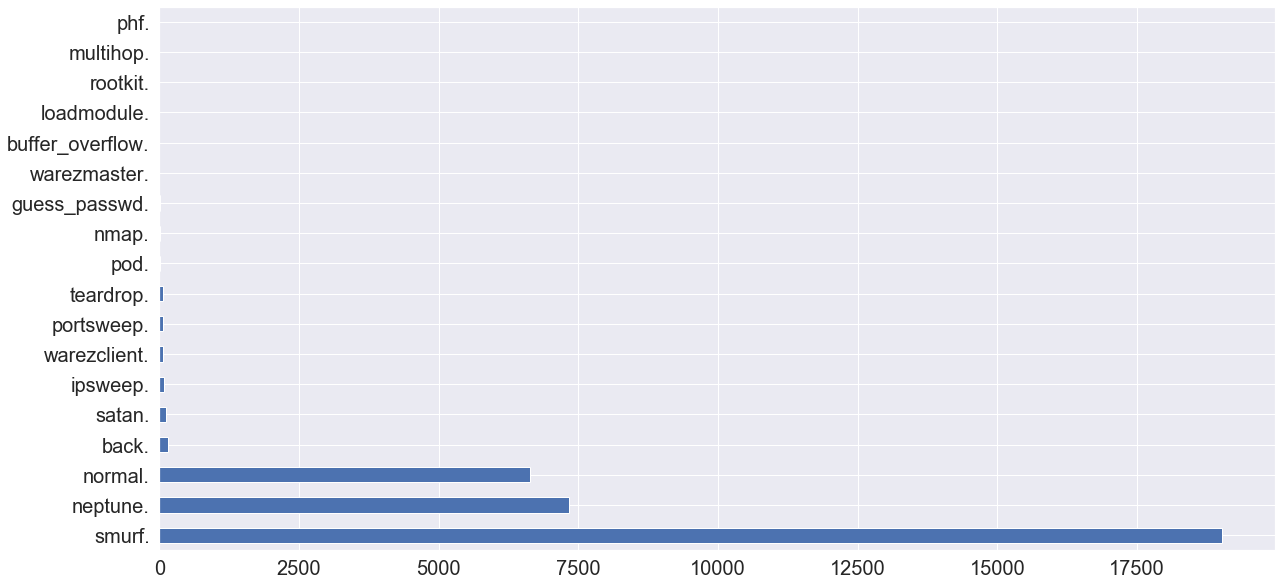

In [17]:
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

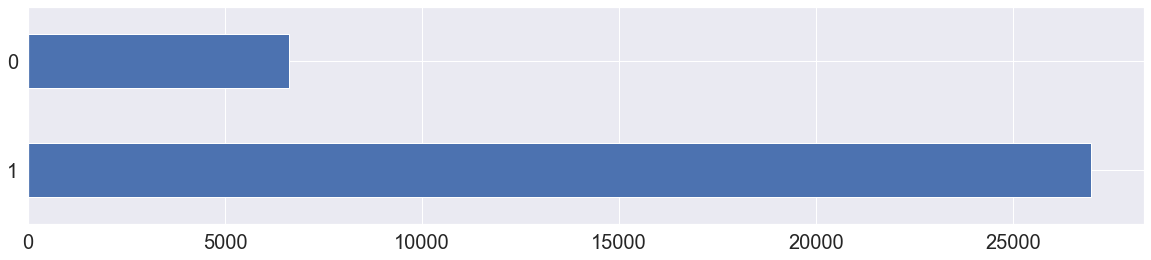

In [18]:
train_attack_cats.plot(kind='barh', figsize=(20,4), fontsize = 20)

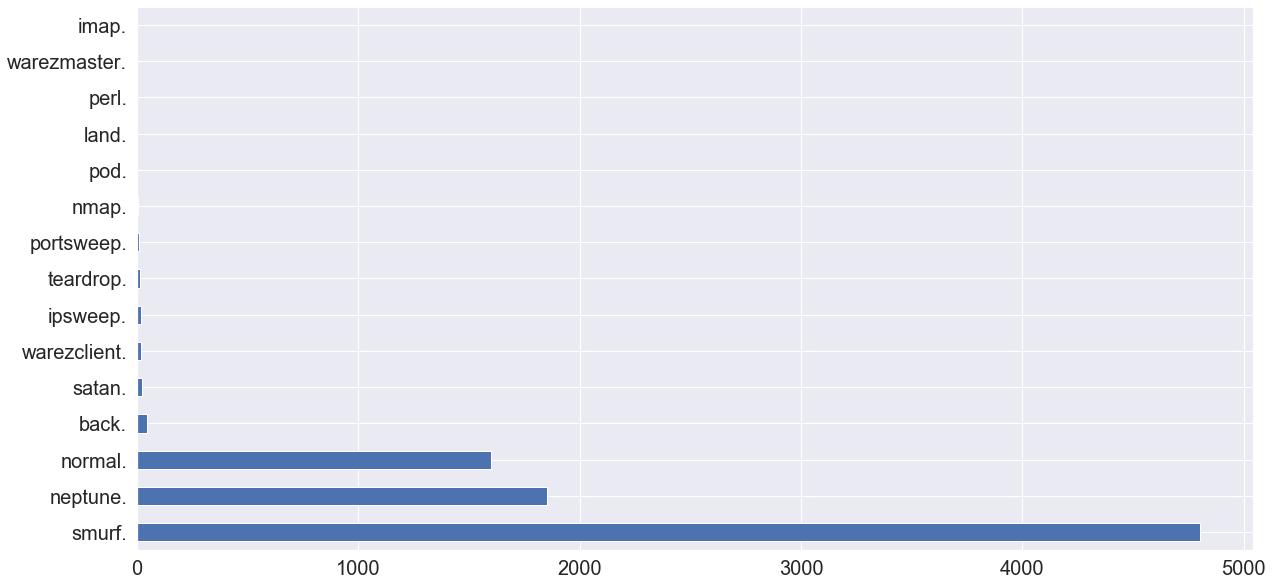

In [19]:
test_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

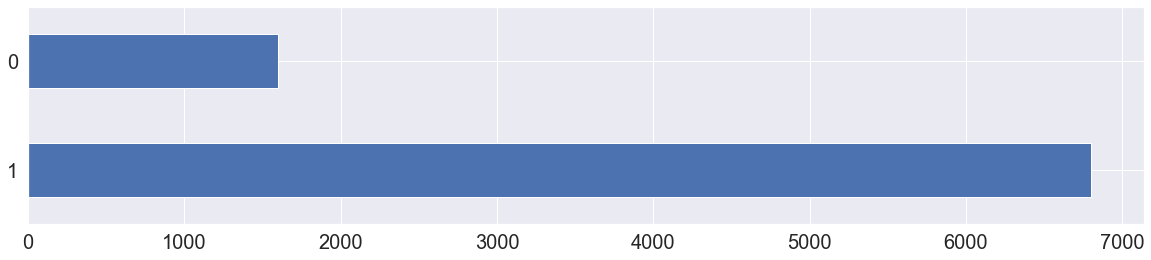

In [20]:
test_attack_cats.plot(kind='barh', figsize=(20,4), fontsize = 20)

### Research about the binary features

By definition, all of these features should have a min of 0.0 and max of 1.0

In [21]:
train_df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
land,33600.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
logged_in,33600.0,0.149524,0.356609,0.0,0.0,0.0,0.0,1.0
root_shell,33600.0,0.000119,0.010910,0.0,0.0,0.0,0.0,1.0
su_attempted,33600.0,0.000030,0.005455,0.0,0.0,0.0,0.0,1.0
is_host_login,33600.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
is_guest_login,33600.0,0.001042,0.032259,0.0,0.0,0.0,0.0,1.0


su_attempted has a max value of 2.0

In [22]:
train_df.groupby(['su_attempted']).size()

su_attempted
0    33599
1        1
dtype: int64

In [23]:
train_df.groupby(['is_host_login']).size()

is_host_login
0    33600
dtype: int64

Fixing this discepancy and assuming that su_attempted=2 -> su_attempted=0

In [24]:
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()

su_attempted
0    33599
1        1
dtype: int64

In [25]:
#it's not a useful feature - let's drop it from the dataset
train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

In [26]:
train_df.drop('is_host_login', axis = 1, inplace=True)
test_df.drop('is_host_login', axis = 1, inplace=True)
binary_cols.remove('is_host_login')

In [27]:
#Data preparation
train_Y = train_df['attack_category']
train_x = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x = test_df.drop(['attack_category','attack_type'], axis=1)

### StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = standard_scaler.transform(train_x[numeric_cols])
test_x[numeric_cols] = standard_scaler.transform(test_x[numeric_cols])

In [29]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,3.360000e+04,3.360000e+04,3.360000e+04,33600.0,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,33600.000000,3.360000e+04,...,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04
mean,-9.600835e-16,1.697251e-15,1.023873e-15,0.0,2.242876e-15,-1.248667e-15,3.979297e-15,1.431616e-15,0.149524,4.985347e-17,...,-6.268927e-16,-2.000391e-15,1.150065e-15,1.203181e-15,2.782496e-15,-1.243202e-16,-1.107124e-15,-1.340776e-15,-1.473689e-17,1.657794e-15
std,1.000015e+00,1.000015e+00,1.000015e+00,0.0,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,0.356609,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-6.718983e-02,-2.796222e-02,-2.304584e-02,0.0,-4.660876e-02,-5.455528e-03,-4.106970e-02,-1.219966e-02,0.000000,-6.298953e-02,...,-3.549820e+00,-1.760252e+00,-1.826761e+00,-2.846777e-01,-1.246342e+00,-1.594906e-01,-4.658652e-01,-4.643859e-01,-2.531605e-01,-2.499683e-01
25%,-6.718983e-02,-2.739768e-02,-2.304584e-02,0.0,-4.660876e-02,-5.455528e-03,-4.106970e-02,-1.219966e-02,0.000000,-6.298953e-02,...,3.502299e-01,-1.402630e+00,-9.520404e-01,-2.846777e-01,-1.246342e+00,-1.594906e-01,-4.658652e-01,-4.643859e-01,-2.531605e-01,-2.499683e-01
50%,-6.718983e-02,-2.113524e-02,-2.304584e-02,0.0,-4.660876e-02,-5.455528e-03,-4.106970e-02,-1.219966e-02,0.000000,-6.298953e-02,...,3.502299e-01,6.301706e-01,6.030185e-01,-2.846777e-01,8.308770e-01,-1.594906e-01,-4.658652e-01,-4.643859e-01,-2.531605e-01,-2.499683e-01
75%,-6.718983e-02,-1.441330e-02,-2.304584e-02,0.0,-4.660876e-02,-5.455528e-03,-4.106970e-02,-1.219966e-02,0.000000,-6.298953e-02,...,3.502299e-01,6.301706e-01,6.030185e-01,1.713625e-01,8.308770e-01,-1.594906e-01,-4.658652e-01,-4.643859e-01,-2.531605e-01,-2.499683e-01
max,5.174809e+01,6.739729e+01,1.282624e+02,0.0,2.287126e+01,1.833003e+02,4.530204e+01,8.196951e+01,1.000000,6.691322e+01,...,3.502299e-01,6.301706e-01,6.030185e-01,8.836126e+00,8.308770e-01,2.339605e+01,2.157386e+00,2.156240e+00,4.067775e+00,4.080608e+00


In [30]:
train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

### Clustering

Use PCA to reduce dimensionality so we can visualize the dataset on a 2d plot

#### K-Means

0
1


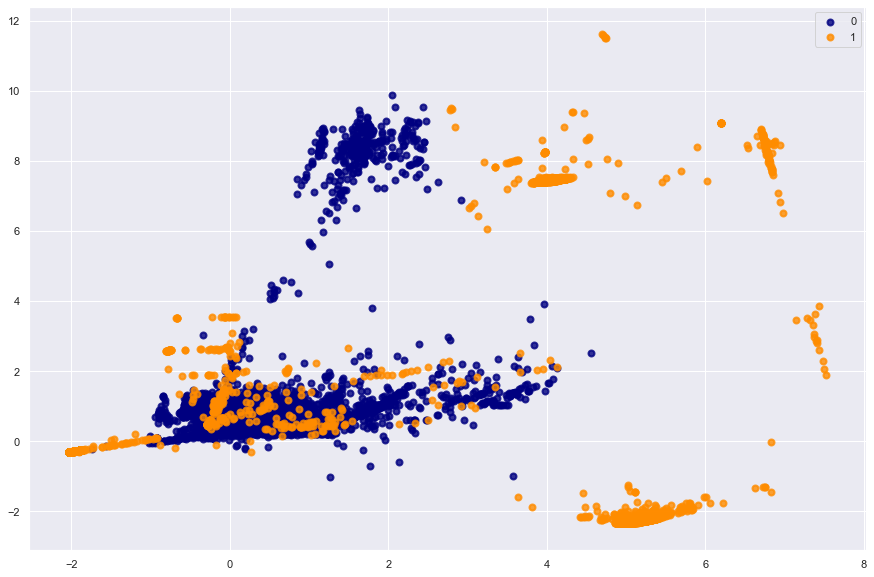

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_x_pca_cont = pca.fit_transform(train_x[numeric_cols])

plt.figure(figsize=(15,10))
colors = ['navy', 'darkorange']

for color, cat in zip(colors, category.keys()):
    print (cat)
    plt.scatter(train_x_pca_cont[train_Y==cat, 0], train_x_pca_cont[train_Y==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

In [32]:
print (train_x_pca_cont.shape)
print (train_x[numeric_cols].shape)

(33600, 2)
(33600, 31)


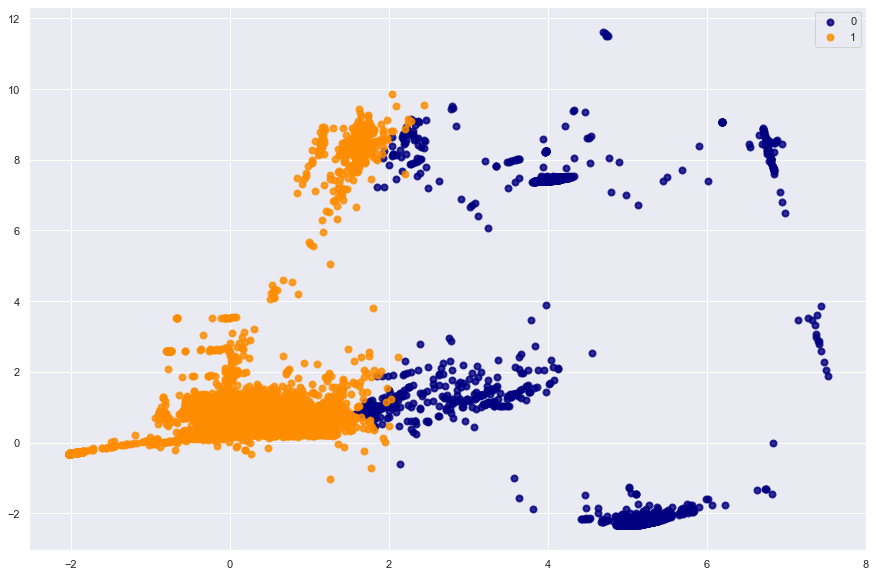

In [33]:
# Apply k-means (k=5, only using numeric cols) + PCA + plot

from sklearn.cluster import KMeans

# Fit the training data to a k-means clustering estimator model
kmeans = KMeans(n_clusters=2, random_state=17).fit(train_x[numeric_cols])

# Retrieve the labels assigned to each training sample
kmeans_y = kmeans.labels_

# Plot in 2d with train_x_pca_cont
plt.figure(figsize=(15,10))
colors = ['navy', 'darkorange']

for color, cat in zip(colors, range(2)):
    plt.scatter(train_x_pca_cont[kmeans_y==cat, 0],
                train_x_pca_cont[kmeans_y==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

In [34]:
print('Total number of features: {}'.format(len(train_x.columns)))
print('Total number of continuous features: {}'.format(len(train_x[numeric_cols].columns)))

Total number of features: 39
Total number of continuous features: 31


In [35]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_Y, kmeans_y))
print("Completeness: %0.3f" % metrics.completeness_score(train_Y, kmeans_y))
print("V-measure: %0.3f" % metrics.v_measure_score(train_Y, kmeans_y))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(train_Y, kmeans_y))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(train_Y, kmeans_y,
                                           average_method='arithmetic'))

Homogeneity: 0.046
Completeness: 0.041
V-measure: 0.043
Adjusted Rand Index: -0.073
Adjusted Mutual Information: 0.043


In [36]:
metrics.accuracy_score(train_Y, kmeans_y)

0.5920238095238095

#### DBSCAN

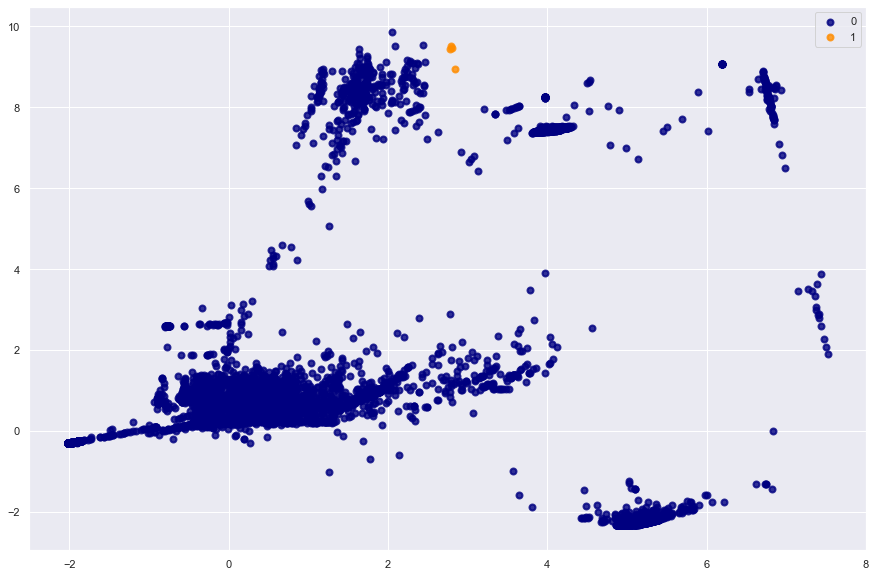

In [37]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

db = DBSCAN(eps=7, min_samples=2).fit(train_x[numeric_cols])
db_y = db.labels_ 


plt.figure(figsize=(15,10))
colors = ['navy', 'darkorange']

for color, cat in zip(colors, range(2)):
    plt.scatter(train_x_pca_cont[db_y==cat, 0],
                train_x_pca_cont[db_y==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

In [38]:
# 聚类的结果
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_noise_ = list(labels).count(-1)
#print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_)

from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_Y, db_y))
print("Completeness: %0.3f" % metrics.completeness_score(train_Y, db_y))
print("V-measure: %0.3f" % metrics.v_measure_score(train_Y, db_y))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(train_Y, db_y))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(train_Y, db_y,
                                           average_method='arithmetic'))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(train_x, kmeans_y))

Homogeneity: 0.011
Completeness: 0.063
V-measure: 0.018
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.017


In [39]:
train_Y = np.array(train_Y)

In [40]:
count = 0
for i in range(33600):
    if train_Y[i] == db_y[i]:
        count = count +1
print (count)

6544


In [41]:
metrics.accuracy_score(train_Y, db_y)

0.19476190476190477